# Regularizing Linear Models

## Setup

In [1]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("ML-Regression-Notebooks"):
    raise ValueError("Please change working directory to 'path/Classifying-the-MNIST' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/ML-Regression-Notebooks


In [2]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Data

In [6]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
xs = np.linspace(0, 3, 100).reshape(-1 , 1)

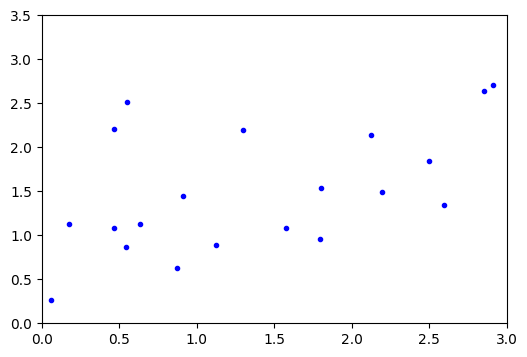

In [16]:
plt.figure(figsize=(6, 4))
plt.axis([0, 3, 0, 3.5])
plt.plot(X, y, "b.")
plt.show()

## Ridge Regression

#### with sklearn

In [18]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.")
    for alpha, style, in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model,
            )
        model.fit(X, y)
        ys = model.predict(xs)
        plt.plot(xs, ys, style, linewidth=2, label=f"alpha = {alpha}")
        plt.axis([0, 3, 0, 3.5])

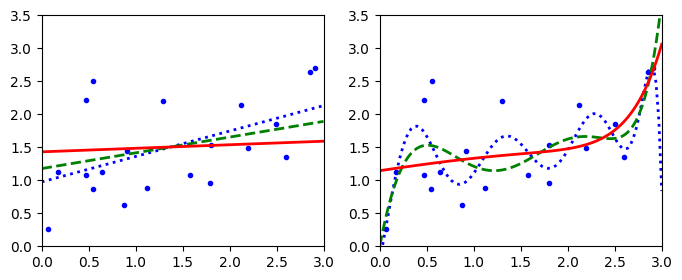

In [42]:
plt.figure(figsize=(8, 3))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 1e-05, 1), random_state=42)